Data download complete.

--- Initial DataFrame ---
Shape of DataFrame: (2515, 2)
Head:
 Price        Date      Close
Ticker                  MSFT
0      2015-09-14  37.504036
1      2015-09-15  38.323109
2      2015-09-16  38.601959
3      2015-09-17  38.558384
4      2015-09-18  37.887428
5      2015-09-21  38.436413
6      2015-09-22  38.253414
7      2015-09-23  38.227261
8      2015-09-24  38.262131
9      2015-09-25  38.288261

Tail:
 Price        Date       Close
Ticker                   MSFT
2505   2025-08-29  506.690002
2506   2025-09-02  505.119995
2507   2025-09-03  505.350006
2508   2025-09-04  507.970001
2509   2025-09-05  495.000000
2510   2025-09-08  498.200012
2511   2025-09-09  498.410004
2512   2025-09-10  500.369995
2513   2025-09-11  501.010010
2514   2025-09-12  509.899994
-------------------------

Training data shape: (1760, 1)
Testing data shape: (755, 1)

--- Split DataFrames ---
Training Data Head:
 Ticker       Date       MSFT
0      2015-09-14  37.504036
1   

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

---------------------

Epoch 1/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - loss: 0.0048
Epoch 2/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - loss: 4.8747e-04
Epoch 3/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - loss: 4.0187e-04
Epoch 4/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - loss: 4.2709e-04
Epoch 5/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - loss: 3.7688e-04
Epoch 6/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - loss: 5.3495e-04
Epoch 7/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - loss: 3.6140e-04
Epoch 8/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - loss: 3.5628e-04
Epoch 9/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - loss: 3.3199e-04
Epoch 10/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - loss: 3.1753e-04
Epoch 11/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - loss: 3.4007e-04
Epoch 12/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - loss: 2.2559e-04
Epoch 13/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - loss: 2.5387e-04
Epoch 14/50
104/104 ━━━━━━━━━━━━━━━━━━━━

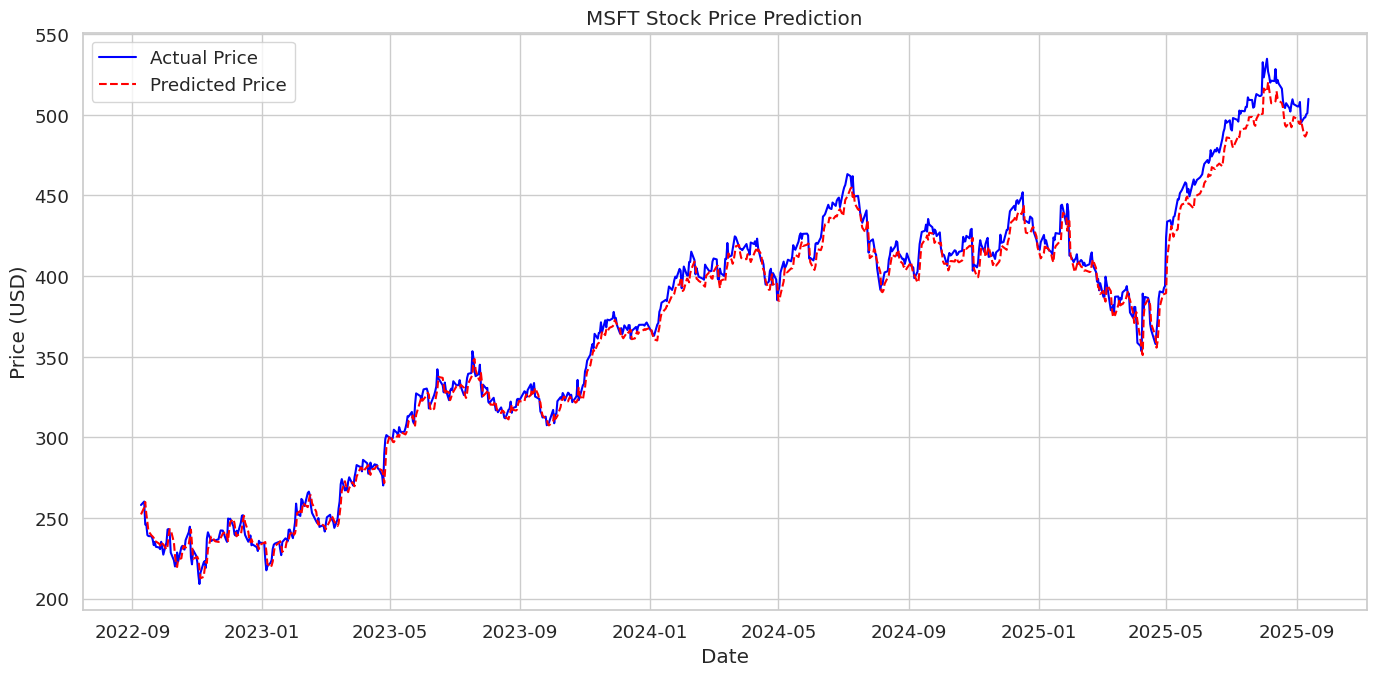

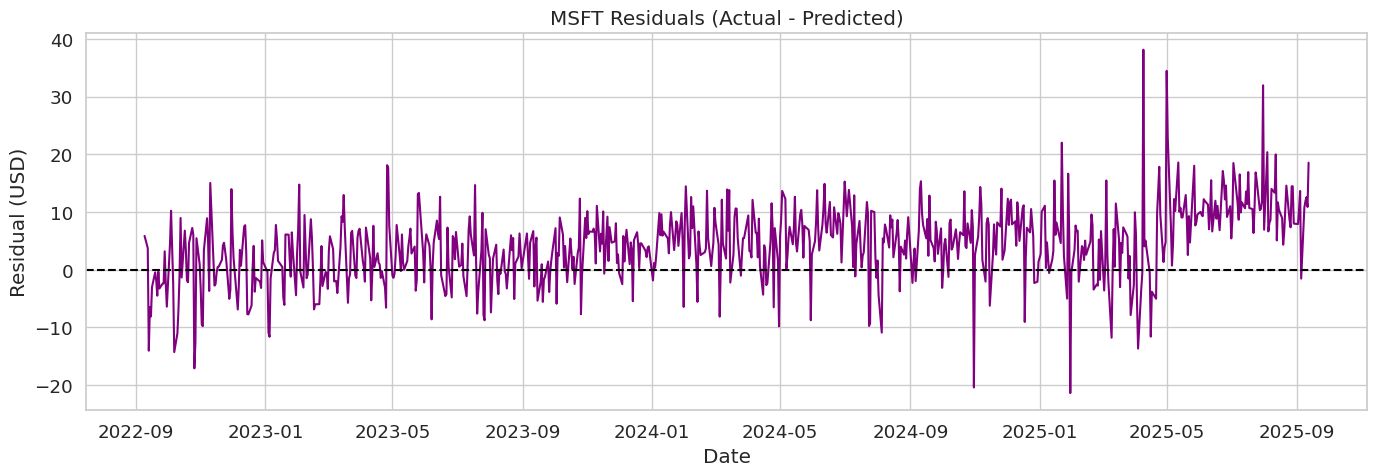

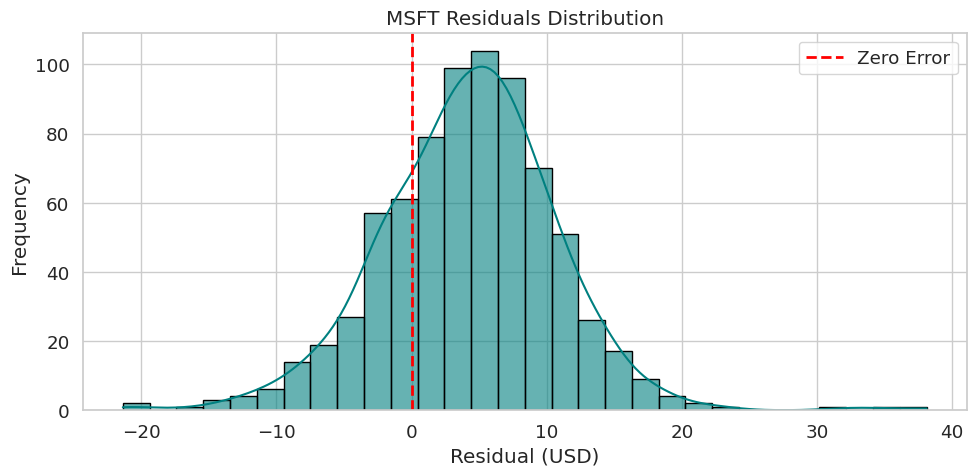

In [2]:
# =========================================
# Stock Prediction Using LSTM (Single Ticker, Simplified with Full Prints)
# =========================================
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os # Import the os module to handle file paths

sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

# -------------------------------
# Parameters
# -------------------------------
ticker = "MSFT"           # Ticker to process
years = 10                # How many years of data to download
seq_length = 100          # LSTM sequence length (days)
epochs = 50
batch_size = 16
train_size_fraction = 0.7 # Fraction of data used for training
model_filename = 'stock_prediction_model.keras' # Define model filename

# -------------------------------
# 1) Download and Prepare Data
# -------------------------------
print(f"Downloading historical data for {ticker}...")
now = datetime.now()
start = datetime(now.year - years, now.month, now.day)
end = now

df = yf.download(ticker, start=start, end=end, auto_adjust=True, progress=False)
df = df[['Close']].dropna()
print("Data download complete.")

# --- Reset index for nicer display ---
df_reset = df.reset_index()           # make Date a column instead of index
df_reset = df_reset.round({'Close': 2})   # round prices for readability

print("\n--- Initial DataFrame ---")
print(f"Shape of DataFrame: {df_reset.shape}")
print("Head:\n", df_reset.head(10))   # show first 10 rows nicely
print("\nTail:\n", df_reset.tail(10)) # show last 10 rows nicely
print("-------------------------\n")



# --- Split data into Training & Testing datasets ---
training_size = int(len(df) * train_size_fraction)
data_training = pd.DataFrame(df['Close'][0:training_size])
data_testing = pd.DataFrame(df['Close'][training_size:])
print(f"Training data shape: {data_training.shape}")
print(f"Testing data shape: {data_testing.shape}")

# --- Reset index and round for nicer display ---
data_training_reset = data_training.reset_index().round({'Close': 2})
data_testing_reset = data_testing.reset_index().round({'Close': 2})

print("\n--- Split DataFrames ---")
print("Training Data Head:\n", data_training_reset.head(10))
print("\nTesting Data Head:\n", data_testing_reset.head(10))
print("------------------------\n")



# --- Scale the data ---
# Crucially, fit the scaler ONLY on the training data to avoid data leakage
scaler = MinMaxScaler(feature_range=(0, 1))
data_training_array = scaler.fit_transform(data_training)
print("--- Scaled Training Data ---")
print(f"Shape of scaled training array: {data_training_array.shape}")
print("First 5 scaled values:\n", data_training_array[:5])
print("--------------------------\n")


# -------------------------------
# 2) Create Training Sequences
# -------------------------------
print("Creating training sequences...")
x_train = []
y_train = []
for i in range(seq_length, len(data_training_array)):
    x_train.append(data_training_array[i-seq_length:i, 0])
    y_train.append(data_training_array[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape for LSTM: [samples, timesteps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print("--- Sequence Shapes ---")
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print("-----------------------\n")


# -------------------------------
# 3) Build and Train the LSTM Model
# -------------------------------
print("Building and training the LSTM model...")
model = Sequential()
model.add(Input(shape=(seq_length, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64, activation='tanh'))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
print("--- Model Summary ---")
model.summary()
print("---------------------\n")


es = EarlyStopping(monitor="loss", patience=5, restore_best_weights=True, verbose=1)
model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[es],
    verbose=1
)
print("Model training complete.")

# --- Save the trained model ---
model.save(model_filename)
print(f"\n✅ Model saved successfully as '{model_filename}' in your current directory.")
print(f"   Full path: {os.path.abspath(model_filename)}")


# -------------------------------
# 4) Prepare Test Data and Predict
# -------------------------------
print("\nPreparing test data and making predictions...")
# Get the last 100 days from training data to form the initial sequence for testing
past_100_days = data_training.tail(seq_length)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
print("\n--- Combined Test DataFrame ---")
print(f"Shape of final_df (past 100 days + test set): {final_df.shape}")
print("Head of final_df:\n", final_df.head())
print("-----------------------------\n")


# Use transform() instead of fit_transform() to prevent data leakage
input_data = scaler.transform(final_df)
print(f"Shape of scaled input_data for testing: {input_data.shape}")

# --- Create test sequences ---
x_test = []
y_test_actual = []
for i in range(seq_length, len(input_data)):
    x_test.append(input_data[i-seq_length:i, 0])
    y_test_actual.append(input_data[i, 0])
x_test, y_test_actual = np.array(x_test), np.array(y_test_actual)

# Reshape for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(f"x_test shape: {x_test.shape}")
print(f"y_test_actual shape: {y_test_actual.shape}")


# --- Make predictions ---
y_predicted_scaled = model.predict(x_test)
print(f"\nShape of scaled predictions: {y_predicted_scaled.shape}")

# --- Inverse transform to get actual price values ---
y_predicted = scaler.inverse_transform(y_predicted_scaled).flatten()
y_test = scaler.inverse_transform(y_test_actual.reshape(-1, 1)).flatten()
print(f"Shape of final predictions (unscaled): {y_predicted.shape}")
print(f"Shape of final actual values (unscaled): {y_test.shape}")

# --- Print a sample of predictions ---
print("\n--- Prediction Sample ---")
prediction_sample = pd.DataFrame({
    'Actual Price': y_test[:5],
    'Predicted Price': y_predicted[:5]
})
print(prediction_sample)
print("-------------------------\n")


# -------------------------------
# 5) Evaluate and Visualize
# -------------------------------
# --- Calculate metrics ---
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predicted)

print("\n" + "="*40)
print(f"📈 Model Evaluation for {ticker}:")
print(f"  - Mean Squared Error (MSE): {mse:.4f}")
print(f"  - Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"  - R-Squared (R²): {r2:.4f}")
print("="*40 + "\n")

# --- Price prediction plot ---
plt.figure(figsize=(14, 7))
sns.lineplot(x=df.index[training_size:], y=y_test, label="Actual Price", color="blue")
sns.lineplot(x=df.index[training_size:], y=y_predicted, label="Predicted Price", color="red", linestyle="--")
plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.tight_layout()
plt.show()

# --- Residuals plot (Actual - Predicted) ---
residuals = y_test - y_predicted

plt.figure(figsize=(14, 5))
sns.lineplot(x=df.index[training_size:], y=residuals, color="purple")
plt.axhline(0, color="black", linestyle="--")
plt.title(f"{ticker} Residuals (Actual - Predicted)")
plt.xlabel("Date")
plt.ylabel("Residual (USD)")
plt.tight_layout()
plt.show()

# --- Residuals distribution (Histogram + KDE) ---
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, bins=30, color="teal", edgecolor="black", alpha=0.6)
plt.axvline(0, color="red", linestyle="--", linewidth=2, label="Zero Error")
plt.title(f"{ticker} Residuals Distribution")
plt.xlabel("Residual (USD)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# =========================================
# predict_next_day_notebook.py
# =========================================
import warnings

import os # Import the os module to handle file paths

import yfinance as yf
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

warnings.filterwarnings("ignore")

# -------------------------------
# Parameters (must match training)
# -------------------------------
seq_length = 100                   # Same as training
model_filename = "stock_prediction_model.keras"

# -------------------------------
# 1) Set ticker (Notebook-friendly)
# -------------------------------
# Option 1: Manual assignment
#ticker = "MSFT"  # <-- change to any ticker you want

# Option 2: Interactive input
ticker = input("Enter ticker symbol (e.g., MSFT): ").upper().strip()

print(f"Ticker selected: {ticker}\n")

# -------------------------------
# 2) Load the trained model
# -------------------------------
if not os.path.exists(model_filename):
    raise FileNotFoundError(f"❌ Model file '{model_filename}' not found. "
                            "Train the model first before running predictions.")

print(f"Loading trained model from '{model_filename}'...")
model = load_model(model_filename)
print("✅ Model loaded successfully.\n")

# -------------------------------
# 3) Download recent data
# -------------------------------
print(f"Downloading recent data for {ticker}...")

end = datetime.now()
start = end - timedelta(days=365 * 2)  # get 2 years to ensure enough history
df = yf.download(ticker, start=start, end=end, auto_adjust=True, progress=False)

if df.empty:
    raise ValueError(f"No data downloaded for {ticker}. Check ticker symbol or internet connection.")

df = df[['Close']].dropna()
print(f"Downloaded {len(df)} rows of data.\n")

# -------------------------------
# 4) Prepare the last 100 days
# -------------------------------
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Ensure we have at least 100 days
if len(scaled_data) < seq_length:
    raise ValueError(f"Not enough data ({len(scaled_data)} rows) to create a sequence of length {seq_length}.")

last_sequence = scaled_data[-seq_length:]
x_input = np.reshape(last_sequence, (1, seq_length, 1))

# -------------------------------
# 5) Predict the next day's closing price
# -------------------------------
predicted_scaled = model.predict(x_input)
predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

# -------------------------------
# 6) Optionally, get company name
# -------------------------------
info = yf.Ticker(ticker).info
company_name = info.get("longName", "Unknown Company")

# Get the last date in the dataset
last_date = df.index[-1]

# Calculate the next business day for the prediction
prediction_date = last_date + pd.tseries.offsets.BDay(1)

print("="*50)
# Use the new 'prediction_date' variable in the f-string
print(f"📈 Predicted closing price for {ticker} ({company_name}) on {prediction_date.strftime('%Y-%m-%d')}: ${predicted_price:.2f}")
print("="*50)

Ticker selected: MSFT

Loading trained model from 'stock_prediction_model.keras'...
✅ Model loaded successfully.

Downloaded 500 rows of data.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
📈 Predicted closing price for MSFT (Microsoft Corporation) on 2025-09-16: $513.47
